In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import keijzer_exogan as ke

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

In [2]:
df = pd.read_csv('Validation error of 5 images')
df.head()

,Unnamed: 0,planet_mass_error,temp_profile_error,ch4_mixratio_error,planet_radius_error,h2o_mixratio_error,co2_mixratio_error,co_mixratio_error,planet_mass_real,temp_profile_real,...,h2o_mixratio_real,co2_mixratio_real,co_mixratio_real,planet_mass_inpainted,temp_profile_inpainted,ch4_mixratio_inpainted,planet_radius_inpainted,h2o_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted
0,0,26.674598,11.543086,-48.337743,-5.743710,-29.959110,-63.496803,-67.803680,2.530667e+27,1555.555582,...,-5.884384,-16.629781,-18.420681,3.205712e+27,1735.114694,-8.591320,9.371807e+07,-4.121475,-6.070402,-5.930781
1,0,46.174997,-12.596392,-15.127290,3.287022,-54.831426,-18.948444,-29.397188,1.771467e+27,1666.666687,...,-18.420681,-13.047982,-14.838882,2.589441e+27,1456.726819,-12.594161,8.023221e+07,-8.320359,-10.575592,-10.476668
2,0,-17.695906,-4.521286,-29.170405,-2.415701,-23.010131,-55.548717,57.798974,3.796000e+27,1777.777791,...,-5.884384,-14.838882,-4.093484,3.124263e+27,1697.399378,-9.241833,9.172090e+07,-4.530379,-6.596073,-6.459476
3,0,-24.221160,6.295140,71.741658,39.789848,-5.993665,384.599298,-1.147817,3.289867e+27,1333.333343,...,-9.466183,-2.302585,-11.257083,2.493023e+27,1417.268544,-13.181660,7.818278e+07,-8.898812,-11.158311,-11.127872


In [3]:
df.describe()

,Unnamed: 0,planet_mass_error,temp_profile_error,ch4_mixratio_error,planet_radius_error,h2o_mixratio_error,co2_mixratio_error,co_mixratio_error,planet_mass_real,temp_profile_real,...,h2o_mixratio_real,co2_mixratio_real,co_mixratio_real,planet_mass_inpainted,temp_profile_inpainted,ch4_mixratio_inpainted,planet_radius_inpainted,h2o_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted
count,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000,...,4.000000,4.000000,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000,4.000000
mean,0.0,7.733132,0.180137,-5.223445,8.729365,-28.448583,61.651334,-10.137428,2.847000e+27,1583.333351,...,-9.913908,-11.704808,-12.152532,2.853110e+27,1576.627359,-10.902244,8.596349e+07,-6.467756,-8.600095,-8.498699
std,0.0,34.177326,10.829788,53.084878,21.040082,20.266032,216.170935,52.891407,8.857333e+26,189.758349,...,5.917200,6.436451,6.117087,3.637931e+26,162.763107,2.320607,7.888139e+06,2.490022,2.637076,2.681886
min,0.0,-24.221160,-12.596392,-48.337743,-5.743710,-54.831426,-63.496803,-67.803680,1.771467e+27,1333.333343,...,-18.420681,-16.629781,-18.420681,2.493023e+27,1417.268544,-13.181660,7.818278e+07,-8.898812,-11.158311,-11.127872
25%,0.0,-19.327220,-6.540062,-33.962240,-3.247703,-36.177189,-57.535738,-38.998811,2.340867e+27,1500.000022,...,-11.704808,-15.286607,-15.734332,2.565337e+27,1446.862251,-12.741036,7.971985e+07,-8.464972,-10.721272,-10.639469
50%,0.0,4.489346,0.886927,-22.148848,0.435661,-26.484620,-37.248580,-15.272502,2.910267e+27,1611.111134,...,-7.675283,-13.943432,-13.047982,2.856852e+27,1577.063099,-10.917997,8.597656e+07,-6.425369,-8.585833,-8.468072
75%,0.0,31.549698,7.607126,6.589947,12.412729,-18.756014,81.938492,13.588881,3.416400e+27,1694.444463,...,-5.884384,-10.361633,-9.466183,3.144626e+27,1706.828207,-9.079205,9.222019e+07,-4.428153,-6.464655,-6.327303
max,0.0,46.174997,11.543086,71.741658,39.789848,-5.993665,384.599298,57.798974,3.796000e+27,1777.777791,...,-5.884384,-2.302585,-4.093484,3.205712e+27,1735.114694,-8.591320,9.371807e+07,-4.121475,-6.070402,-5.930781


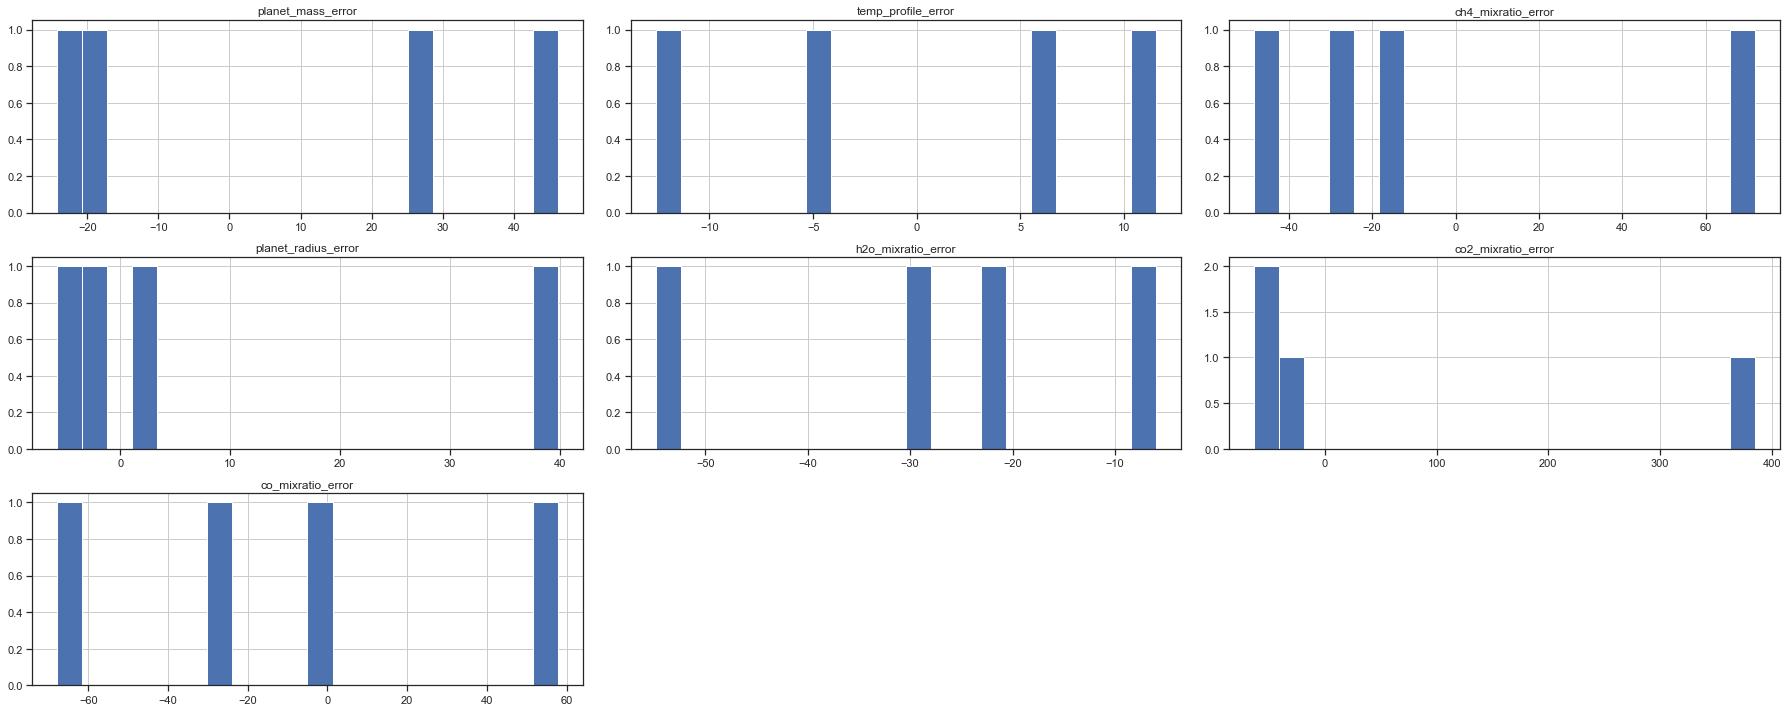

In [4]:
params = ['planet_mass','temp_profile','ch4_mixratio','planet_radius','h2o_mixratio','co2_mixratio','co_mixratio']

plt.figure(figsize=((25,10)))
for i,param in enumerate(params):
    plt.subplot(3,3,i+1)
    plt.title(param+'_error')
    plt.hist(df[param+'_error'], bins=20)
    plt.grid()
    plt.tight_layout()

# Grab the $n$ sigma errors

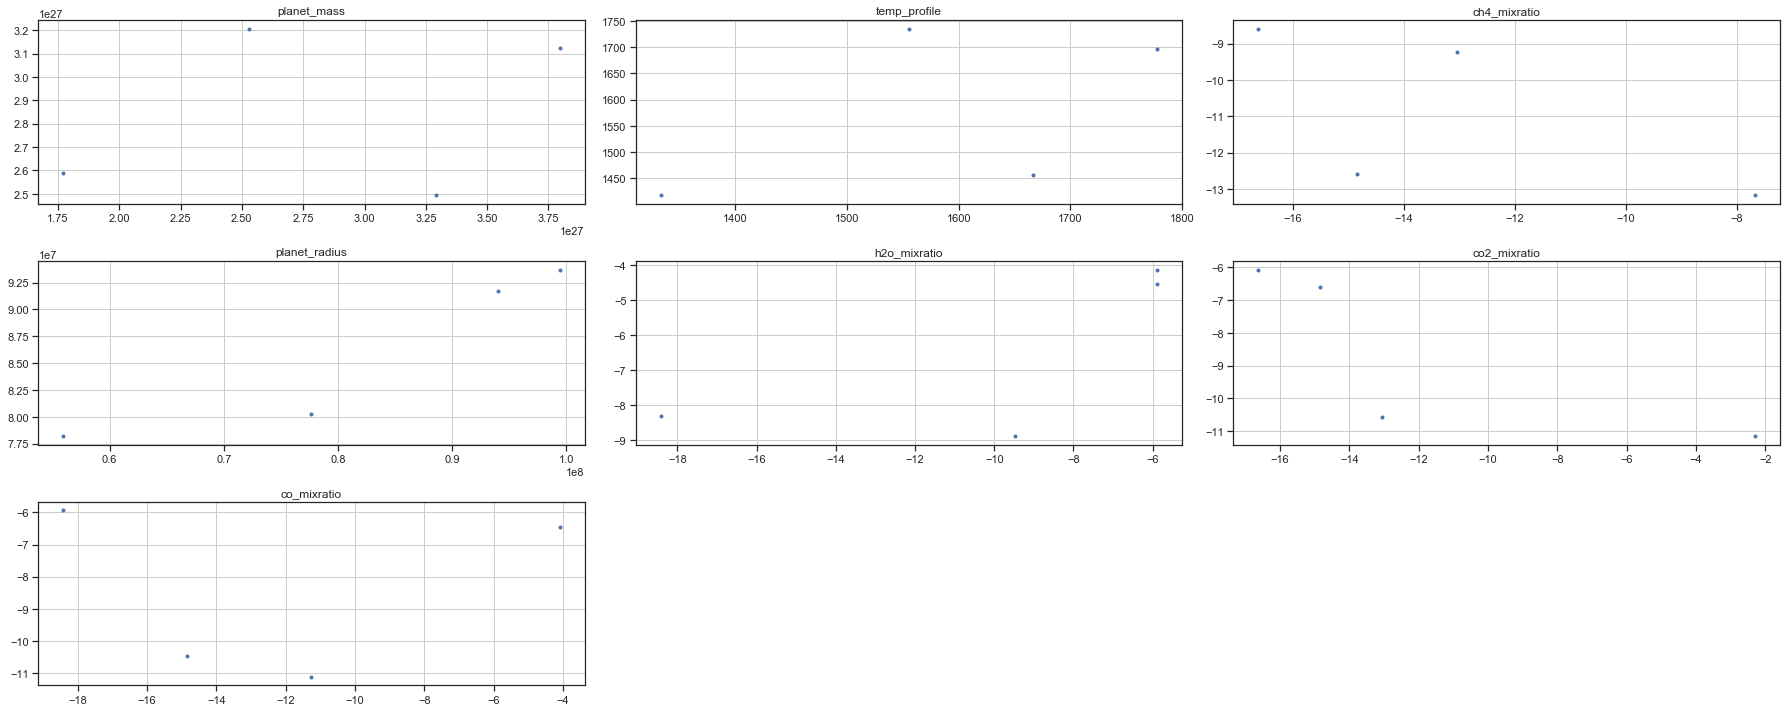

In [5]:
plt.figure(figsize=((25,10)))

for i,param in enumerate(params):
    plt.subplot(3,3,i+1)
    plt.title(param)
    plt.plot(df[param+'_real'], df[param+'_inpainted'], '.')
    plt.grid()
    plt.tight_layout()